In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
print("Done")

Done


In [2]:
from main_classes.voltage_maps import VoltageMapCollection
from main_classes.epsilon_cover import BasicCoverTree, run_cover_properties_test, estimate_span
from utilities.generate_toy_data import non_uniform_1d_experiment
print("DONE")

DONE


### Load data

In [3]:
data, _, _ = non_uniform_1d_experiment()
print(data.shape)

(24000, 1)


### Build epsilon covers

In [4]:
epsilon_reduce_factor = 2
init_radius = estimate_span(data)
epsilon_cover_factory = BasicCoverTree(init_radius)
for x in data:
    epsilon_cover_factory.insert(x)
print("DONE")

DONE


##### Estimate densities

In [5]:
centers_dict = epsilon_cover_factory.get_centers()
data, ref_epsilon_cover, ref_epsilon_cover_densities = non_uniform_1d_experiment()
epsilon_cover_factory.estimate_densities(data)
densities = epsilon_cover_factory.get_densities()
print("DONE")

DONE


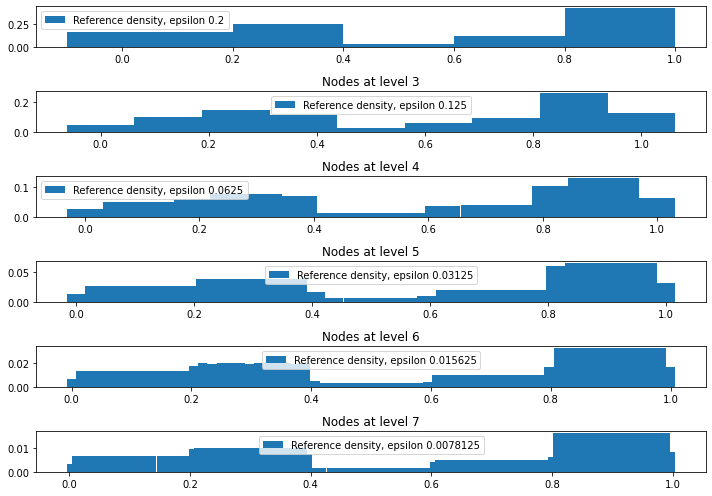

In [6]:
%matplotlib inline
epsilon = 0.2
lvlstart = 3
lvlstop = 8

max_lvl = lvlstop-1
fig, axes = plt.subplots(lvlstop-lvlstart+1, 1, figsize=(10, 7))
axes[0].bar(x=ref_epsilon_cover.flatten(), height=ref_epsilon_cover_densities, width=epsilon, label=f'Reference density, epsilon {epsilon}', align='center')
axes[0].legend()
for i, lvl in enumerate(range(lvlstart, lvlstop)):
    centers = centers_dict[lvl]
    epsilon = init_radius / (epsilon_reduce_factor ** lvl)

    axes[i+1].set_title(f'Nodes at level {lvl}')
    axes[i+1].bar(x=np.array(centers).flatten(), height=densities[lvl], 
                   width=epsilon, label=f'Reference density, epsilon {epsilon}', align='center')
    axes[i+1].legend()
plt.tight_layout()
plt.show()

###### Levels to check

In [7]:
max_lvl = 7
start_lvl = 3

##### Get centers

Plot level 1
Number of centers lvl 1 = 3
Plot level 2
Number of centers lvl 2 = 5
Plot level 3
Number of centers lvl 3 = 9
Plot level 4
Number of centers lvl 4 = 17
Plot level 5
Number of centers lvl 5 = 33
Plot level 6
Number of centers lvl 6 = 65
Plot level 7
Number of centers lvl 7 = 129


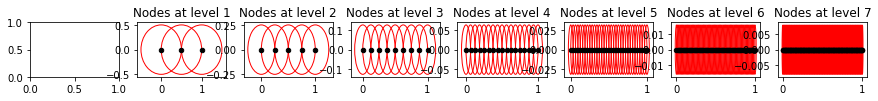

In [8]:
%matplotlib inline
centers = epsilon_cover_factory.get_centers()

fig, axes = plt.subplots(1, max_lvl+1, figsize=(15, 1))
for lvl in range(1, max_lvl+1):
    centers = centers_dict[lvl]
    print(f'Plot level {lvl}')
    print(f'Number of centers lvl {lvl} = {len(centers)}')
    radius = init_radius / (epsilon_reduce_factor ** lvl)
    for center in centers:
        axes[lvl].set_title(f'Nodes at level {lvl}')
        axes[lvl].add_patch(plt.Circle(tuple([center, 0]),
                                    radius=radius, color='r', fill=False))
        axes[lvl].scatter(center, 0, s=20, c='k', marker='o', zorder=2)

plt.show()

## Construct voltage map collection and propagate voltages

In [9]:
voltage_map_collections = {}
source_indices = {}
epsilon_cover = epsilon_cover_factory.get_epsilon_cover(max_lvl = max_lvl+1)

source_centers_start_level = epsilon_cover[start_lvl]['centers']
for lvl in range(start_lvl, max_lvl):
    indices = []
    for source_center in source_centers_start_level:
        indices.append(np.where(epsilon_cover[lvl]['centers'] == source_center)[0])
    source_indices[lvl] = np.array(indices).flatten()


In [10]:
for lvl in range(start_lvl, max_lvl):
    voltage_map_collections[lvl] = VoltageMapCollection(epsilon_cover[lvl], source_indices[lvl])
    voltage_map_collections[lvl].propagate_voltage_maps()

epsilon_cover['epsilon']:  0.125
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  0.125
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  0.125
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  0.125
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  0.125
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  0.125
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  0.125
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  0.125
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  0.125
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01


propagating labels:  11%|█████▉                                                 | 109/1000 [00:00<00:00, 440442.33it/s]


epsilon_cover['epsilon']:  0.0625
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  0.0625
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  0.0625
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  0.0625
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  0.0625
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  0.0625
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  0.0625
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  0.0625
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  0.0625
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01


propagating labels:  12%|██████▊                                                 | 121/1000 [00:00<00:00, 61613.55it/s]


epsilon_cover['epsilon']:  0.03125
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  0.03125
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  0.03125
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  0.03125
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  0.03125
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  0.03125
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  0.03125
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  0.03125
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  0.03125
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01


propagating labels:  12%|██████▊                                                | 124/1000 [00:00<00:00, 331481.00it/s]


epsilon_cover['epsilon']:  0.015625
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  0.015625
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  0.015625
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  0.015625
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  0.015625
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  0.015625
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  0.015625
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  0.015625
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  0.015625
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01


propagating labels:  12%|██████▊                                                | 123/1000 [00:00<00:00, 489932.95it/s]


##### Calculate voltage directly on the training points as a reference

In [11]:
epsilon_cover_ref = {}
epsilon_cover_ref['centers'] = data
epsilon_cover_ref['densities'] = np.ones(data.shape[0])/data.shape[0]
epsilon_cover_ref['epsilon'] = 1/data.shape[0]

source_centers = epsilon_cover[start_lvl]['centers'][source_indices[start_lvl]]
indices = []
for source_center in source_centers:
    indices.append(np.where(data == source_center)[0])
source_indices_in_data = np.array(indices).flatten()

In [12]:
voltage_map_ref_collections = VoltageMapCollection(epsilon_cover_ref, source_indices_in_data)
voltage_map_ref_collections.propagate_voltage_maps()

epsilon_cover['epsilon']:  4.1666666666666665e-05
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  4.1666666666666665e-05
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  4.1666666666666665e-05
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  4.1666666666666665e-05
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  4.1666666666666665e-05
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  4.1666666666666665e-05
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  4.1666666666666665e-05
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  4.1666666666666665e-05
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01
epsilon_cover['epsilon']:  4.1666666666666665e-05
self.kernel_bandwidth:  0.22
self.weight_to_ground:  0.01


propagating labels:  12%|███████▏                                                   | 122/1000 [00:18<02:15,  6.50it/s]


#####  Level 3

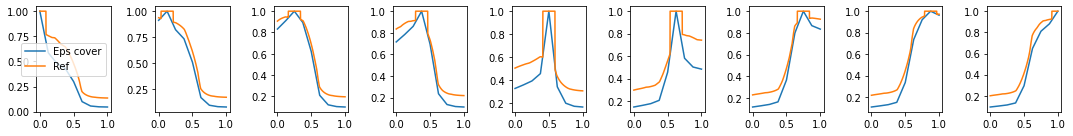

In [13]:
voltage_map_collection = voltage_map_collections[start_lvl].get_voltage_map_collection()
voltage_map_ref_collection = voltage_map_ref_collections.get_voltage_map_collection()

fig, axes = plt.subplots(1, len(voltage_map_collection), figsize=(15, 2))
for i in range(len(voltage_map_collection)):
    voltage_map = voltage_map_collection[i]
    voltage_map_ref = voltage_map_ref_collection[i]
    axes[i].plot(epsilon_cover[start_lvl]['centers'], voltage_map.get_voltage(), label='Eps cover')
    axes[i].plot(data, voltage_map_ref.get_voltage(), label='Ref')
    axes[i].set_xticks([0, 0.5, 1])
axes[0].legend()
plt.tight_layout()
plt.show()

##### level 4

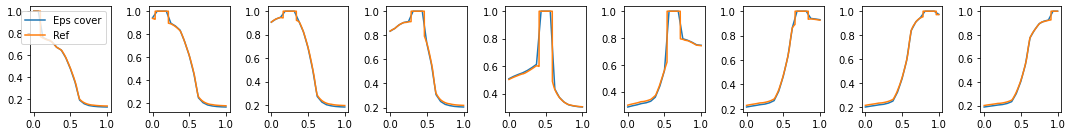

In [14]:
# Second level
lvl = start_lvl + 1

voltage_map_collection = voltage_map_collections[lvl].get_voltage_map_collection()
voltage_map_ref_collection = voltage_map_ref_collections.get_voltage_map_collection()

fig, axes = plt.subplots(1, len(voltage_map_collection), figsize=(15, 2))
for i in range(len(voltage_map_collection)):
    voltage_map = voltage_map_collection[i]
    voltage_map_ref = voltage_map_ref_collection[i]
    axes[i].plot(epsilon_cover[lvl]['centers'], voltage_map.get_voltage(), label='Eps cover')
    axes[i].plot(data, voltage_map_ref.get_voltage(), label='Ref')
    axes[i].set_xticks([0, 0.5, 1])
axes[0].legend()
plt.tight_layout()
plt.show()

###### Level 5

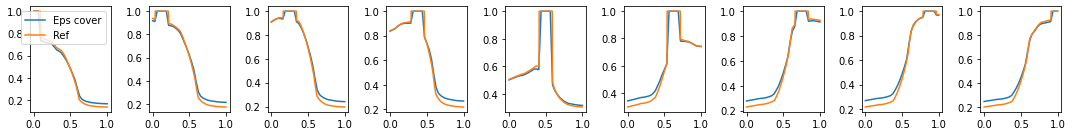

In [15]:
# Third level
lvl = start_lvl + 2
voltage_map_collection = voltage_map_collections[lvl].get_voltage_map_collection()
voltage_map_ref_collection = voltage_map_ref_collections.get_voltage_map_collection()

fig, axes = plt.subplots(1, len(voltage_map_collection), figsize=(15, 2))
for i in range(len(voltage_map_collection)):
    voltage_map = voltage_map_collection[i]
    voltage_map_ref = voltage_map_ref_collection[i]
    axes[i].plot(epsilon_cover[lvl]['centers'], voltage_map.get_voltage(), label='Eps cover')
    axes[i].plot(data, voltage_map_ref.get_voltage(), label='Ref')
    axes[i].set_xticks([0, 0.5, 1])
axes[0].legend()
plt.tight_layout()
plt.show()

###### Level 6

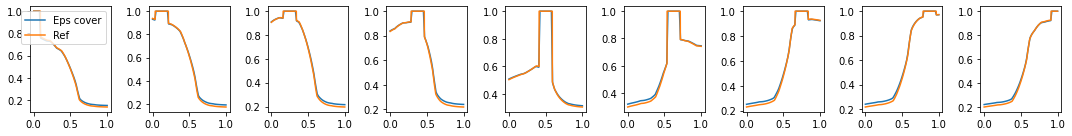

In [16]:
lvl = start_lvl + 3
voltage_map_collection = voltage_map_collections[lvl].get_voltage_map_collection()
voltage_map_ref_collection = voltage_map_ref_collections.get_voltage_map_collection()

fig, axes = plt.subplots(1, len(voltage_map_collection), figsize=(15, 2))
for i in range(len(voltage_map_collection)):
    voltage_map = voltage_map_collection[i]
    voltage_map_ref = voltage_map_ref_collection[i]
    axes[i].plot(epsilon_cover[lvl]['centers'], voltage_map.get_voltage(), label='Eps cover')
    axes[i].plot(data, voltage_map_ref.get_voltage(), label='Ref')
    axes[i].set_xticks([0, 0.5, 1])
axes[0].legend()
plt.tight_layout()
plt.show()

###### Compare voltage at levels

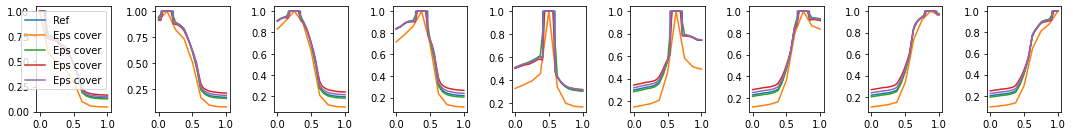

In [19]:
fig, axes = plt.subplots(1, len(voltage_map_collection), figsize=(15, 2))
for i in range(len(voltage_map_collection)):
    voltage_map_ref_collection = voltage_map_ref_collections.get_voltage_map_collection()
    voltage_map_ref = voltage_map_ref_collection[i]
    axes[i].plot(data, voltage_map_ref.get_voltage(), label='Ref')
    for lvl in range(start_lvl, start_lvl+4):
        voltage_map_collection = voltage_map_collections[lvl].get_voltage_map_collection()
        voltage_map = voltage_map_collection[i]
        axes[i].plot(epsilon_cover[lvl]['centers'], voltage_map.get_voltage(), label='Eps cover')
    axes[i].set_xticks([0, 0.5, 1])
axes[0].legend()
plt.tight_layout()
plt.show()

###### Compare errors

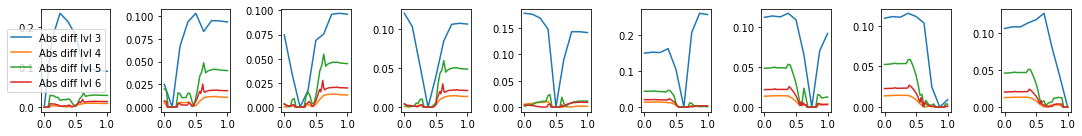

In [18]:
fig, axes = plt.subplots(1, len(voltage_map_collection), figsize=(15, 2))
for i in range(len(voltage_map_collection)):
    
    for lvl in range(start_lvl, max_lvl):
        voltage_map_collection = voltage_map_collections[lvl].get_voltage_map_collection()
        voltage_map_ref_collection = voltage_map_ref_collections.get_voltage_map_collection()

        voltage_map = voltage_map_collection[i]
        voltage_map_ref = voltage_map_ref_collection[i]
    
        indices  = []
        for eps_cov_center in epsilon_cover[lvl]['centers']:
            indices.append(np.where(data == eps_cov_center)[0])
        indices_eps_cover = np.array(indices).flatten()

        abs_diff = abs(voltage_map.get_voltage()-voltage_map_ref.get_voltage()[indices_eps_cover])
    
        axes[i].plot(epsilon_cover[lvl]['centers'], abs_diff, label=f'Abs diff lvl {lvl}')
        axes[i].set_xticks([0, 0.5, 1])
axes[0].legend()
plt.tight_layout()
plt.show()